# Ejercicio de programación Regresión Polinomial

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#Conecta con Google
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=";",skiprows=1)

data = pd.read_csv('/content/gdrive/MyDrive/Datasets/heart_2020_cleaned V2.csv', header=0)

#data = np.loadtxt('/content/gdrive/MyDrive/Datasets/heart_2020_cleaned.csv', delimiter=',')
print(data)

#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
#for i in range(10):
#    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               313014 non-null  float64
 2   Smoking           313014 non-null  object 
 3   AlcoholDrinking   313014 non-null  object 
 4   Stroke            313014 non-null  object 
 5   PhysicalHealth    313014 non-null  float64
 6   MentalHealth      313014 non-null  float64
 7   DiffWalking       313014 non-null  object 
 8   Sex               313014 non-null  object 
 9   AgeCategory       313014 non-null  object 
 10  Race              313014 non-null  object 
 11  Diabetic          313014 non-null  object 
 12  PhysicalActivity  313014 non-null  object 
 13  GenHealth         313014 non-null  object 
 14  SleepTime         313014 non-null  float64
 15  Asthma            313014 non-null  object 
 16  KidneyDisease     31

In [ ]:
#columna_eliminar0 = ['GenHealth']
data.drop(data.columns[13], axis = 1, inplace=True)

#columna_eliminar1 = ['Race']
data.drop(data.columns[10], axis=1, inplace=True)

#columna_eliminar1 = ['AgeCategory']
data.drop(data.columns[9], axis=1, inplace=True)

#columna_eliminar1 = ['Sex']
#data.drop(data.columns[8], axis=1, inplace=True)

print(data)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex Diabetic PhysicalActivity  SleepTi

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               313014 non-null  float64
 2   Smoking           313014 non-null  object 
 3   AlcoholDrinking   313014 non-null  object 
 4   Stroke            313014 non-null  object 
 5   PhysicalHealth    313014 non-null  float64
 6   MentalHealth      313014 non-null  float64
 7   DiffWalking       313014 non-null  object 
 8   Sex               313014 non-null  object 
 9   Diabetic          313014 non-null  object 
 10  PhysicalActivity  313014 non-null  object 
 11  SleepTime         313014 non-null  float64
 12  Asthma            313014 non-null  object 
 13  KidneyDisease     313014 non-null  object 
 14  SkinCancer        313014 non-null  object 
dtypes: float64(4), object(11)
memory usage: 36.6+ MB


In [ ]:
data1 = data

In [ ]:
data2 = data
print(data2)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex Diabetic PhysicalActivity  SleepTi

In [ ]:
#AQUI CAMBIAMOS LAS CADENAS DE TEXTO POR VALORES ENTRE 0 Y 1 (MALE = 1 FEMALE = 0)
sex = {'Male':1, 'Female':0}
data2['Sex'] = data2['Sex'].map(sex)
print(data2)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking  Sex Diabetic PhysicalActivity  SleepTime 

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               313014 non-null  float64
 2   Smoking           313014 non-null  object 
 3   AlcoholDrinking   313014 non-null  object 
 4   Stroke            313014 non-null  object 
 5   PhysicalHealth    313014 non-null  float64
 6   MentalHealth      313014 non-null  float64
 7   DiffWalking       313014 non-null  object 
 8   Sex               313014 non-null  float64
 9   Diabetic          313014 non-null  object 
 10  PhysicalActivity  313014 non-null  object 
 11  SleepTime         313014 non-null  float64
 12  Asthma            313014 non-null  object 
 13  KidneyDisease     313014 non-null  object 
 14  SkinCancer        313014 non-null  object 
dtypes: float64(5), object(10)
memory usage: 36.6+ MB


In [ ]:
booleano = {'Yes': 1, 'No': 0}
columnas_a_cambiar = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for columna in columnas_a_cambiar:
    data2[columna] = data2[columna].map(booleano)
print(data2)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0.0  16.60      1.0              0.0     0.0             3.0   
1                0.0  20.34      0.0              0.0     1.0             0.0   
2                0.0  26.58      1.0              0.0     0.0            20.0   
3                0.0  24.21      0.0              0.0     0.0             0.0   
4                0.0  23.71      0.0              0.0     0.0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790           1.0  27.41      1.0              0.0     0.0             7.0   
319791           0.0  29.84      1.0              0.0     0.0             0.0   
319792           0.0  24.24      0.0              0.0     0.0             0.0   
319793           0.0  32.81      0.0              0.0     0.0             0.0   
319794           0.0  46.56      0.0              0.0     0.0             0.0   

        MentalHealth  DiffW

In [ ]:
#TOMAMOS LAS X DESDE LA COLUMNA 1 HASTA LA 15
#TOMAMOS COMO Y A LA COLUMNA 0
#DAMOS EL VALOR A M
X = data.iloc[:, 1:15]
y = data.iloc[:, 0]
m = y.size

In [ ]:
# Dividimos los datos en Train (80%) y test (20%)
train_dataB, test_dataB = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# creamos un archivo para el dataset de entrenamiento
train_dataB.to_csv("train2.csv", index=False)

In [ ]:
# creamos un archivo para el dataset de prueba
test_dataB.to_csv("test2.csv", index=False)

In [ ]:
#Cargamos el dataset de entrenamiento
data = pd.read_csv('train2.csv')

In [ ]:
# Leemos el dataset y seleccionamos las columnas para X y y
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

In [ ]:
#NORMALIZAMOS LOS DATOS PARA QUE ESTEN EN UNA MISMA ESCALA
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0.0  23.33      1.0              0.0     0.0             0.0   
1                1.0  27.46      1.0              0.0     1.0            30.0   
2                0.0  32.69      0.0              0.0     0.0             2.0   
3                0.0  31.32      0.0              0.0     0.0             0.0   
4                1.0  24.63      1.0              0.0     0.0             2.0   
...              ...    ...      ...              ...     ...             ...   
255831           0.0  29.65      0.0              0.0     0.0             0.0   
255832           0.0  42.60      1.0              0.0     0.0             0.0   
255833           NaN    NaN      NaN              NaN     NaN             NaN   
255834           0.0  22.24      0.0              0.0     0.0             7.0   
255835           0.0  36.39      1.0              0.0     0.0             0.0   

        MentalHealth  DiffW

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def calcular(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcular(theta, X, y))
    return theta, J_history

In [ ]:
#AHORA CARGAMO LOS DATOS DE PRUEBA
data = pd.read_csv('test2.csv')
print(data)

       HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0               0.0  27.63      1.0              0.0     0.0             0.0   
1               0.0  21.95      0.0              0.0     0.0             0.0   
2               0.0  31.32      1.0              0.0     0.0             0.0   
3               0.0  40.35      0.0              0.0     0.0            30.0   
4               0.0  35.61      1.0              0.0     0.0            30.0   
...             ...    ...      ...              ...     ...             ...   
63954           0.0  28.06      1.0              0.0     0.0             0.0   
63955           0.0  29.68      1.0              0.0     0.0             7.0   
63956           0.0  21.11      0.0              0.0     0.0             4.0   
63957           0.0  23.99      0.0              0.0     0.0             0.0   
63958           0.0  31.87      1.0              0.0     0.0            30.0   

       MentalHealth  DiffWalking  Sex  

In [ ]:
fila_deseada=2

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("fila no existe")

[ 0.   31.32  1.    0.    0.    0.    0.    0.    0.    0.    1.    6.
  1.    0.    0.  ]


theta calculado por el descenso por el gradiente: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):nan


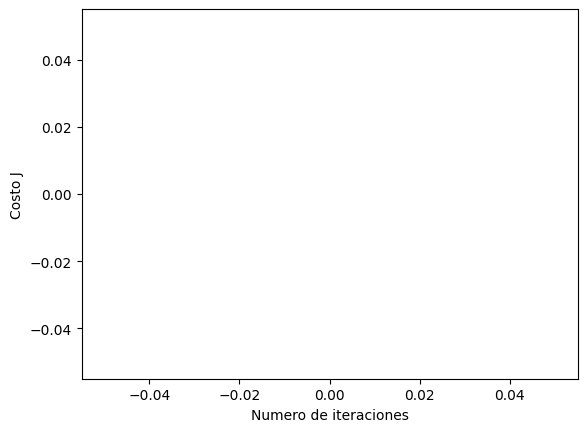

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.05
num_iters = 15000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si se presenta un incendio o no
X_array = [1, 1.65471696e+09,4.33300000e+01, 1.85300000e+01, 0.00000000e+00,
 4.00000000e+02, 1.36210000e+04, 2.13220000e+04, 9.36812000e+02,
 1.16000000e+00, 1.21000000e+00, 7.98000000e+00, 1.24500000e+00,
 2.80000000e-02, 4.76800000e+03]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [ ]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [ ]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('theta inicial (zeros): {:.3f}'.format(cost))
print('valor esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta inicial (zeros): nan
valor esperado (aproximado): 0.693

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Gradiente en theta inicial (zeros):
	[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.21462558,  0.17585177,  0.07401689, -0.18056766,  0.09697655,  0.04380724,
 -0.04832358,  0.15383585, -0.11280644,  0.04992442,  0.03834761,  0.05785728,
  0.03740429,  0.02606025, -0.3042659])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[-0.21462558  0.17585177  0.07401689 -0.18056766  0.09697655  0.04380724
 -0.04832358  0.15383585 -0.11280644  0.04992442  0.03834761  0.05785728
  0.03740429  0.02606025 -0.3042659 ]
Costo en theta prueba: nan
Gradiente en theta prueba:
	[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [ ]:
#  Predice la probabilidad de que tenga una enfermedad del corazon
prob = sigmoid(np.dot([1, 1.65471696e+09,4.33300000e+01, 1.85300000e+01, 0.00000000e+00,
 4.00000000e+02, 1.36210000e+04, 2.13220000e+04, 9.36812000e+02,
 1.16000000e+00, 1.21000000e+00, 7.98000000e+00, 1.24500000e+00,
 2.80000000e-02, 4.76800000e+03], theta))
print('Para la deteccion de humo con los datos introducidos la probabilidad es de: {:.3f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para la deteccion de humo con los datos introducidos la probabilidad es de: nan
Precisión de entrenamiento: 0.00 %
Precisión esperada (aproximadamente): 89.00 %
